# Termodynamiske sykluser

### TFY4165 Termisk fysikk - Numerisk Øving 

**Forkunnskaper**: Programmeringskunnskaper tilsvarende det opparbeidet i ITGK, samt noen av ferdighetene opparbeidet i emnene FY1001, FY1003 og TFY4163. I denne øvingen er plotting i 2 dimensjoner med matplotlib antatt som kjent. I tillegg krever øvingen kunnskaper fra numerisk integrasjon i matematikk 1 og tidligere fysikk-kurs.

**Læringsmål**: Plotte noen sykliske termodynamiske prosesser og beregne arbeidet utført i prosessene. I tillegg skal dere få et lite innblikk i objektorientert programmering (ofte kalt OOP) i Python. Til slutt er denne øvingen en god øvelse i å sette seg inn i kode som noen andre har skrevet, med en syntaks og i et programmerings-paradigme som dere sannsynligvis ikke har lang erfaring med. 

I denne øvingen skal du fullføre implementasjonen av et grensesnitt for å plotte sykliske termodynamiske prosesser i et pV-diagram. En syklisk prosess er en sammensatt prosess som starter og slutter i samme punkt i pV-diagrammet. Vi skal bruke en én-atomig gass som arbeidssubstans, for enkelhets skyld. Det er også viktig å presisere at vi ser på idealiserte prosesser, som i flere tilfeller kan være ganske ulike fra hvordan de presterer i virkeligheten.  

Når implementasjonen er ferdig har du et grenesnitt som kan brukes til å plotte to ulike sykliske termodynamiske prosesser, samt beregne arbeidet utført i prosessene, på en enkel måte. Dette vil være et tydelig eksempel på hvordan funksjonalitet som krever en ganske lang implementasjon kan løftes et abstraksjonsnivå til kun noen få enkle funksjoner som en bruker trenger å forholde seg til. Det er dette som gjerne kalles et grensesnitt (interface), Fordelen med dette er naturligvis at en bruker kun trenger å forholde seg til grensesnittet, uten å vite hvordan implementasjonen ser ut. 

Implementasjonen du fullfører her er på ingen måte komplett. Det finnes mange funksjoner som kan legges til. Flere av løsningene som er brukt kunne også vært skrevet på andre, bedre måter. Men slik er det ofte i programvareutvikling. Prøv gjerne å jobbe videre med implementasjonen dersom du skulle ønske det!

Nedenfor følger klassen vi skal implementere. Det er forsøkt å lage så gode beskrivelser som mulig gjennom kommentarer og illustrative navn på kodeblokker og variabler. En ekstra forklaring av hva som foregår følger i cellen under koden. 

Det er anbefalt å lese gjennom hele øvingen først, slik at du ser hvordan det er meningen at grensesnittet skal brukes, før du begynner å skrive noe kode. Det er også lagt til noen eksempler på hvordan man kan bruke koden en rekke steder, for å hjelpe deg i gang. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import R

class ThermodynamicCycles:
    """Class for working with thermodynamic cycles.
    
    The working substance is an ideal gas. 
    With the physical approximations used the class is valid for cycles
    between two temperatures (min approx 180 K to max approx 6000 K).
    The cycles are worked with in the clockwise direction.  
    
    Methods (API):
        plot(): make a figure to plot in and plots the cycle(s) given when making an object. 
        show(): shows the figure with the plot you made with plot().
        work(panels): calculates the work in the cycle(s) given when making an object. 
                      `panels` represents the amount of panels used when approximating the work numerically. 
    
    Extra utility (added to the class to avoid dependending on non-standard functions defined elsewhere): 
        simpsons_method(f, a, b, n)
        trapezoid_method(f, a, b, n)

    Dependencies: 
        matplotlib.pyplot (as plt)
        numpy (as np)
        scipy.constants.R
    """
    
    # Class variables.
    Cp = 1 # For an ideal gas at approx roomtemperature: Must be set by student.
    Cv = 1 # For an ideal gas at approx roomtemperature: Must be set by student.
    gamma = Cp/Cv # Ratio between Cp and Cv (polytropic index). 
    n = 1 # 1 mole of the working substance.
    
    def __init__(self, temps, volumes, cycles): 
        """Construct an object. Implicitly called when an object is instantiated."""
        # Assertions to rule out some possible constructor argument errors. 
        assert len(temps) == 2, "Processes can only be plotted between two temperatures."
        assert (type(volumes) is tuple or type(volumes) is list) \
                and len(volumes) == 2 \
                and (type(volumes[0]) is float or type(volumes[0]) is int) \
                and (type(volumes[1]) is float or type(volumes[1]) is int), \
                """`volumes` must be a list or tuple of size 2, with integers or floats. 
                The maximum value is assumed to be the volume in the start (@ point A) 
                and the minimum value is assumed to be the volume @ point B.
                """
        assert (type(cycles) is list or type(cycles) is tuple) and \
               len(cycles) <= 2, "`cycles` must be a list or a tuple of length <= 2."
        
        # Instance variables.
        self.T1 = min(temps)
        self.T2 = max(temps)
        self.volume_A = min(volumes)
        self.volume_B = max(volumes)
        self.cycles = cycles
        
        self.markersize = 3 # Used to change size of points when plotting. 
        
        # Used to map a cycle-name to a method. 
        self.method_mapping = {
            "carnot": self.carnot, 
            "stirling": self.stirling
        }
        
        # All letters in self.cycles to lowercase,
        self.lower_cycles = list(map(lambda x: x.lower(), self.cycles)) 
        # This is done to use self.method_mapping when plotting in self.figure()
        # and when calculating work for the given cycles in self.work().
        
        # Checks that input in cycles is either Stirling or Carnot. 
        assert [True for cycle in self.lower_cycles if (cycle == "stirling" or cycle == "carnot")], \
               "This class is only able to work with `Carnot` and/or `Stirling`."
        
        # Points calculated for each cycle in self.figure() are added here. 
        # This way they can be used in other methods, as self.work().
        # The points are all set to [1,1] by default. 
        # The keys are possible elements in self.lower_cycles.
        self.calculated_points = {
            "carnot": [[1,1], [1,1], [1,1], [1,1]],
            "stirling": [[1,1], [1,1], [1,1], [1,1]]
        } 
        
     
    def carnot(self): 
        """Plot a Carnot-cycle. Calculate the points in the Carnot cycle."""
        
        def v2_sol(v1, p1):
            """Part of the solution to the (adiabatic) system."""
            # 2a
            return 1
        
        def p2_sol(v2):
            """Part of the solution to the (adiabatic) system."""
            # 2a
            return 1
        
        # Points A and B are inserted into self.calculated_points["carnot"].
        self.calculated_points["carnot"][0] = (0, 0) # Calculate point A!
        self.calculated_points["carnot"][1] = (0, 0) # Calculate point B!
        
        # Makes code a bit more verbose later. 
        A = self.calculated_points["carnot"][0]
        B = self.calculated_points["carnot"][1]
        
        # Points C and D are inserted into self-calculated_points["Carnot"].
        self.calculated_points["carnot"][2] = (0,0) # Calculate point A!
        self.calculated_points["carnot"][3] = (0,0) # Calculate point D!
        
        # Makes code a bit more verbose later. 
        C = self.calculated_points["carnot"][2]
        D = self.calculated_points["carnot"][3]
        
        # Now that all the points are found, the plotting can commence.
        
        # Examples: 
        
        # Plots an isothermal at T = 1000 K from (10,10) to (20, 20).
        x = np.linspace((10,10)[0], (20,20)[0], 100)           
        plt.plot(x, self.ideal_gas_law(1000)(x), label=r"$T = {}$ K".format(1000), color="red")
        
        # Plots an adiabatic for k = 1 from (10, 10) to (20, 20). 
        x = np.linspace((10,10)[0], (20,20)[0], 100)   
        k = 1 # Calculates k from adiabatic equation. 
        plt.plot(x, self.adiabatic(k)(x), label="Adiabatic", color="black")
        
        # Plot point adn annotation at Z = (10,10)
        self.annotate(point = (10,10), label = "Z", markersize = self.markersize)
        
        # 2b: Complete the method!
        
    def stirling(self, fill = True):
        """Plot an idealized Stirling-machine. Calculate the points in the Stirling cycle."""
        
        # Points A and B are inserted into self.calculated_points["stirling"].
        self.calculated_points["stirling"][0] = (0, 0) # Calculate point A!
        self.calculated_points["stirling"][1] = (0, 0) # Calculate point B!
        
        #Makes code a bit clearer.
        A = self.calculated_points["stirling"][0]
        B = self.calculated_points["stirling"][1]
        
        # Points C and D are inserted into self.calculated_points["stirling"].
        self.calculated_points["stirling"][2] = (0, 0) # Calculate point C!
        self.calculated_points["stirling"][3] = (0, 0) # Calculate point D!
                                                 
        #Makes code a bit clearer.
        C = self.calculated_points["stirling"][2]
        D = self.calculated_points["stirling"][3]                              
        
        # Now that all the points are found, the plotting can commence. 
        
        # Fills the area inside the Stirling-cycle. 
        if fill: 
            pass
            # plt.fill_between() could be used here, if you want to add it. 
                                  
        # Examples: 
        
        # Plots an isothermal at T = 1000 K from (10,10) to (20, 20).
        x = np.linspace((10,10)[0], (20,20)[0], 100)           
        plt.plot(x, self.ideal_gas_law(1000)(x), label=r"$T = {}$ K".format(1000), color="red")
        
        # Plot point adn annotation at Z = (10,10)
        self.annotate(point = (10,10), label = "Z", markersize = self.markersize) 
        
        # 1a: Complete the method!
    
    
    def show(self):
        """Show the figure with the cycles that are given."""
        handles, labels = plt.gca().get_legend_handles_labels() # Gets handles and labels for legend.
        by_label = dict(zip(labels, handles)) # Makes a dictionary with labels as key and handles as value. 
                                              # This way there is only one label for similar handles. 
        plt.legend(by_label.values(), by_label.keys()) # Plots the given labels and handles in legend.
        plt.show()
        
        
    def plot(self):
        """Make a figure to plot in and plot the given cycles."""
        # En del av dette kan settes av studenten også!
        plt.figure()
        plt.ylabel("$p$")
        plt.xlabel("$V$")
        plt.title(", ".join(map(str, self.cycles))+" i pV-diagram.")
        # map(str, self.cycles) applies the str-function to all elements in self.cycles.
        
        all_points = [] # Used further down to make xlim and ylim dynamic. 
        
        # Traverses the dictionary of the cycles (in lowercase) that the user wants to plot.
        for cycle in self.lower_cycles:
            self.method_mapping[cycle]() # Maps the desired cycle to the correct plotting method. 
            all_points += self.calculated_points[cycle] # Appends points to the list.
        
        # Makex the xlim and ylim properties dynamic with input. 
        x, y = zip(*all_points) # Makes one list of x_values and one list of y_values.
        min_x = min(x)
        max_x = max(x)
        min_y = min(y)
        max_y = max(y)
        plt.xlim(min_x - max_x/10, max_x + max_x/10)
        plt.ylim(min_y - max_y/10, max_y + max_y/10)
        
        return self # This must be here to be able to chain the methods when calling them on an object.
    
    
    def work(self, panels):
        """Calculate work in specified cycle. Returns a dict of work in each cycle."""        
        
        work = {} # Dictionary where work per given cycle is stored. This is returned. 
        
        for cycle in self.lower_cycles:
            # Calculate the work of each cycle with both Simpson's method and trapezoid. 
            # Both are done in LF for illustrational purposes. 
            
            # Makes code a bit clearer. Points from each cycle (either Stirling or Carnot).
            A = self.calculated_points[cycle][0]
            B = self.calculated_points[cycle][1]
            C = self.calculated_points[cycle][2]
            D = self.calculated_points[cycle][3]
            
            # Work from A -> B.
            workA_B = 1 # Calculate integral numerically. 
            
            if not cycle == "stirling": # B -> C and D -> A are adiabatic. 
                # Not a very extendable solution, but easiest in this case. 
                # Could be replaced with something more general/andvanced if wanted. 
                
                # Work from B -> C.
                workB_C = 1 # Calculate integral numerically. 
               
                # Work from D -> A.
                workD_A = 1 # Calculate integral numerically. 
                
            else: # B -> C and D -> are isochore. 
                # Are these correct? 
                workB_C = 1
                workD_A = 1
                
            # Work from C -> D.
            workC_D = 1 # Calculate integral numerically. 
           
            # Sums up the total work. 
            total_work = workA_B + workB_C + workC_D + workD_A
            
            # Adds the total of the given cycle to the dict. 
            work[cycle] = total_work
            
        # 1b: Complete the method!
            
        return work
    
    
    # **kwargs = keyword arguments. kwargs is a dict with keys and values provided as arguments. 
    def annotate(self, **kwargs):  
        """Make annotations on points in plot."""
        point = kwargs["point"]
        plt.annotate(r"${}$".format(kwargs["label"]), (point[0], point[1]), fontsize="13")
        plt.plot(point[0], point[1], 'ko', markersize=kwargs["markersize"])
        
        
    def ideal_gas_law(self, T):
        """Return a lambda function, with parameter x, with the ideal gas law at temperature T."""
        return (lambda x: self.n*R*T/x) # Returns a lambda function (a nameless function).
        # This is done do that the return value can be called with only x as a parameter. 
        # simpsons_method and trapezoid_method take functions with one parameter that are callable. 
    
    
    def adiabatic(self, k):
        """Return a lambda function, with parameter x, with the ideal adiabatic equation with constant k."""
        return (lambda x: k/x**self.gamma) # Returns a lambda function (a nameless function).
        # This is done do that the return value can be called with only x as a parameter. 
        # simpsons_method and trapezoid_method take functions with one parameter that are callable. 
    
    
    def simpsons_method(self, f, a, b, n):
        """Numerical integration.
        
        f: Function to integrate
        a: Beginning point
        b: End point
        n: Number of intervals. 
        Return approximated integral. 
        """
        # Write this code! (Either this or trapezoid_method)
        return 1
        
        
    def trapezoid_method(self, f, a, b, n):
        """Numerical integration.
        
        f: Function to integrate
        a: Beginning point
        b: End point
        n: Number of intervals. 
        Return approximated integral. 
        """
        # Write this code! (Either this or simpsons_method)
        return 1
    

### Introduksjon 

I OOP snakker vi om klasser og objekter. En klasse er det du ser ovenfor. Den kan ses på som en slags oppskrift på en datatype - et objekt. Objektet er en instans av den gitte klassen. Det er ikke meningen at dere skal ha dette på plass med én gang, da dere naturligvis vil få en skikkelig introduksjon til disse konseptene i TDT4102 - Prosedyre- og objektorientert programmering. Det er derimot greit å ha dette i bakhodet når du leser gjennom øvingen. 

Funksjonene dere ser inne i klassen kalles ofte metoder når de er definert inne i en klasse i OOP, noe som er grunnen til den begrepsbruken. Vi sier at vi bruker en metode på et objekt.

Metoden `__init__` kalles en konstruktør. Det er den som kalles (implisitt) når dere oppretter et objekt av klassen `ThermodynamicCycles`. Et eksempel følger. 

In [2]:
temps = [300, 400]
volumes = [41.71, 58.3]
cycles = ["Stirling", "Carnot"]

# Oppretter et objekt av klassen som heter mitt_objekt.
mitt_objekt = ThermodynamicCycles(temps, volumes, cycles)
# Her kalles konstruktøren __init__ implisitt. 
# Parameterne som __init__ har i parameterlisten 
# tas inn som argumenter her, utenom 'self'!

Du har sikkert lagt merke til at ordet `self` brukes mange steder. Det forteller enkelt og greit Python at metoden er en metode i klassen vi implementerer. Når `self` skrives i parameterlisten i metodene kan vi benytte metodene på objektet vårt med et punktum, slik du ser eksempler i neste celle.

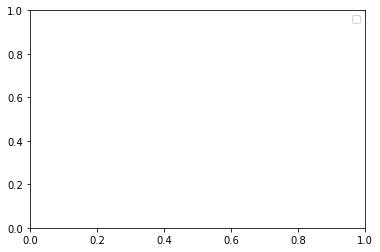

{'stirling': 4, 'carnot': 4}


In [3]:
mitt_objekt.show()
print(mitt_objekt.work(1))

`Instance variables` og `Class variables` er variabler som kan brukes inne i klassen når du skriver implementasjonen. Vi sier ikke noe mer her om hvordan de skiller seg fra hverandre. Disse variablene (og metoder definert i klassen) kan brukes når du skriver implementasjonene dine. <strong> Men</strong>, det er viktig å huske på å bruke ordet `self.` foran disse, slik at Python skjønner at den skal lete inne i klassen. Dette ser du en mengde eksempler på gjennom hele klassedefinisjonen ovenfor. Utenom det kan de brukes som vanlig.

Før du begynner er det viktig at du lar de kodesnuttene som er i klassen fra før av stå, slik at du er sikker på at du får det til å virke slik vi ønsker. 

### Oppgave '0.5' - Fyll inn for $C_V$ og $C_p$  
Det er viktig at du fyller inn rett verdier for $C_V$ og $C_p$ i klassedefinisjonen under `Class variables`. Husk at vi har en ideell gass som arbeidssubstans, omkring romtemperatur. Derfor er det greit å anta at varmekapasitetene er konstante. 

**a)** Fyll inn rett verdi for $C_V$ og $C_p$ øverst i klassedefinisjonen.

### Oppgave 1 - Idealisert Stirling-syklus

I den første oppgaven skal vi se på en kjent termodynamisk prosess, oppfunnet av Robert Stirling i 1816: Stirling-maskinen. Vi skal se på en idealisert versjon av den. Den prosessen består av følgende komponenter

* $A \rightarrow B$, Isoterm ekspansjon ved temperatur $T_2$, 
* $B \rightarrow C$, Isokor trykkreduksjon, 
* $C \rightarrow D$, Isoterm kompresjon ved temperatur $T_1$,
* $D \rightarrow A$, Isokor trykkøkning, 

der $T_2 > T_1$. Vi antar at alle disse prosessene er reversible. 

**a)** Skriv kode som plotter denne prosessen i metoden `stirling` i klassen `ThermodynamicCycles`. Husk at hvert objekt som blir opprettet kun får volumet i $A$ og $B$ som input. Det betyr at du må beregne trykket i $A$ og $B$, samt punktene $C$ og $D$ før du plotter. Vis retningen syklusen går i, for eksempel ved å plotte punktene $A$, $B$, $C$ og $D$. Hint: Du har metoden `annotate` i klassen `ThermodynamicCycles` til rådighet. 

Du har metoden `ideal_gas_law` til rådighet når du skal beregne punktene og plotte. Legg merke til at denne returnerer en såkalt lambda-funksjon. Dette er navnløs funksjon, som kan kalles akkurat som en `def`-funksjon du er vant til. Det betyr at du må kalle metoden på en litt annen måte enn du er vant til. 

<code> ideal_gas_law(100) </code> returnerer altså en funksjon. Det betyr at dersom du for eksempel ønsker å kalle metoden ved temperatur 100 kelvin og $x = 10$, må du skrive 

<code> ideal_gas_law(100)(10) </code>. Grunnen til at dette er gjort blir forhåpentligvis litt klarere når du kommer til oppgave **b)**.


**b)** Fyll inn kode for å fullføre metoden `work` i klassen `ThermodynamicCycles`. Den skal beregne arbeidet i syklusene spesifisert når du oppretter et objekt. For å få til dette må du bruke numerisk integrasjon. Her har vi valgt at du skal bruke enten sammensatt Simpsons metode eller sammensatt trapesmetode (metoder over flere intervaller/paneler). Implementer den metoden du mener er best, eller implementer begge hvis du ønsker. Dette gjøres i metoden(e) `simpsons_method` og/eller `trapezoid_method`. Fjern den du eventuelt ikke ønsker å bruke. Ta gjerne en titt på temasidene i matematikk 1 dersom du ikke husker hvordan disse metodene fungerer. Denne kan du kalle i `work` for å beregne integraler numerisk. Grunnen til at disse funksjonene, som brukes til å beregne integraler numerisk, er definert i klassen er at det er ønskelig med minst mulig avhengighet til andre, ikke-standard funksjoner som er definert <strong> utenfor </strong> klassen. Det kan nemlig være fort gjort å glemme å definere eller importere funksjoner fra andre steder, noe som er dumt dersom klassen avhenger av dem for å fungere. 

### Oppgave 2 - Carnot-syklus

Carnot-maskinen er den viktigste sykliske termodynamiske prosessen vi ser på i dette kurset. Den ble foreslått av Sadi Carnot i 1824, som svar på hvordan man skal få mest mulig arbeid ut av en gitt mengde brensel (PC Hemmer). Den er en teoretisk konstruksjon, og gir en øvre grense for virkningsgraden til en termodynamisk maskin. Til tross for sin teoretisek natur kan den likevel være nyttig å studere. En liten repetisjon av hvordan den ser ut følger. 

* $A \rightarrow B$, Isoterm ekspansjon ved temperatur $T_2$, 
* $B \rightarrow C$, Adiabatisk ekspansjon, 
* $C \rightarrow D$, Isoterm kompresjon ved temperatur $T_1$,
* $D \rightarrow A$, Adiabatisk kompresjon,

der $T_2 > T_1$. Vi antar at alle disse prosessene er reversible. 

I oppgave **b)** skal du skrive kode som plotter Carnot-prosessen i et pV-diagram. For at det skal være mulig må du finne et uttrykk som kan brukes til å plotte en adiabat. For en ideell gass vet vi at

$$
    pV^\gamma = \mathrm{konstant} = k.
$$

Dette kalles den adiabatiske tilstandsligning. Ligningen medfører at

$$
    p_1V_1^\gamma = p_2V_2^\gamma. 
$$

**a)** Løs ligningen over, sammen med ideell gasslov, for $V_2$ og $p_2$, som er ukjente. Sett løsningene inn i funksjonene `v2_sol` og `p2_sol` i metoden `carnot`. Disse kan du deretter bruke til å finne $C$ og $D$, til å finne konstanten $k$ og dermed til å plotte adiabatene.

**b)** Skriv kode som plotter hele denne prosessen i funksjonen `carnot` i klassen `ThermodynamicCycles`. Husk at du også her må beregne manglende punkter før du plotter. Vis retningen syklusen går i, for eksempel ved å plotte punktene $A$, $B$, $C$ og $D$. Hint: Du har metoden `annotate` i klassen `ThermodynamicCycles` til rådighet. I tillegg har du metoden `adiabatic` til rådighet, som fungerer på samme måte som `ideal_gas_law` i oppgave **1a)**.

### Bruk av grensesnittet

Hvordan bruker du egentlig dette grensesnittet? I docstringen i klassen, dvs den røde teksten helt øverst i klassedefinisjonen, ser du en kategori jeg har kalt `Methods (API)`. Her blir de funksjonene en bruker av grensesnittet trenger å forholde seg til forklart. 

I cellen nedenfor ser dere hvordan dere skal kunne opprette objekter av klassen med 
* Spesfiserte temperaturer for de to isotermene, 
* Spesifiserte volum for punktene A og B, 
* Hvilke(n) syklisk(e) prosess(er) du ønsker å plotte i samme figur. 

I tillegg ser du hvordan du kan bruke metodene i grensesnittet
* `plot`,
* `show`,
* `work`.

Denne cellen fungerer dersom dere har gjort alt rett. Det er viktig å nevne at du må plotte prosessene dine før du beregner arbeidet for at `work` skal gi et fornuftig resultat. 

In [ ]:
temps = [300, 400]
volumes = [41.71, 58.3]

# Lager et objekt med kun Stirling.
stir = ThermodynamicCycles(temps, volumes, ["Stirling"])

# Plotter Stirling.
stir.plot().show()

# Beregner arbeid med 2000 paneler. 
work_dict = stir.work(2000)
print(work_dict)

### Oppgave 3 - Observasjon

**a)** Lag et objekt som kan plotte både Carnot- og Stirling-syklusene, samt beregne arbeidet i begge syklusene. Hvilken av dem gjør størst arbeid på omgivelsene? Hvorfor?

In [ ]:
# Skriv koden din her.

**Mitt svar:** 

**b)** Senk $T_1$ med, for eksempel, 100 kelvin, plott objektet og beregn arbeidet. Sammenlign dette med hvis du øker $T_2$ med 100 kelvin (samme mengde). Hvilken gir størst effekt? Hvorfor?

**Mitt svar:** 

Denne klassen kan fint utbedres med mer og bedre funksjonalitet, men dette kan være en ålreit start. Du kan jo for eksempel legge til funksjonalitet for å jobbe med en Ericsson-syklus, dersom du har lyst.

Forhåpentligvis har du på veien fått et lite innblikk i hva som gjør OOP til et velkjent og mye brukt paradigme i programmering.

## Ekstra: Kuriositet - Python Docstrings

En docstring er en streng som fungerer som dokumentasjon for en funksjon eller annen kodeblokk. Denne forklarer hva funksjonen gjør, for eksempel ved å liste opp hvilke parametere den har og hva som er returverdien, dersom det er tilfellet. Hvordan disse defineres har ulike konvensjoner.

Som du har sett er konvensjonen i Python at man skriver en docstring på første linje straks etter definisjonen av en kodeblokk, som for eksempel en funksjon, klasse eller modul. For one liner docstrings skal avsluttende-`"""` komme på slutten av den samme linja, mens for multiline docstrings skal avsluttende-`"""` komme på en egen linje etter docstringen. Det finnes en grundig dokumentasjon på docstring-konvensjoner i Python, som du kan lese om i PEP 257 -- Docstring Conventions. 

Hva er årsaken til at man skriver såkalte docstrings? 
En årsak til at det brukes er at disse strengene kan hentes av den som programmerer, slik at man kan få en forklaring på hva en kodeblokk gjør. Dette kan være nyttig dersom man for eksempel ønsker en rask avklaring på hva som er returverdien til en funksjon eller dersom nan ikke har umiddelbar tilgang til kildekode. En annen grunn kan være at dersom du ønsker å generere dokumentasjon til prosjektet ditt, for eksempel med Sphinx eller PyDoc, blir doocstringene du skriver brukt til nettopp dette. Det er veldig fint å slippe å skrive all dokumentasjon for hånd til slutt. 

Disse skiller seg dermed fra vanlige kommentarer i koden, som ikke behandles av kompilatoren eller "interpreter" (i Python sitt tilfelle, i mangel på et bedre norsk ord). Prøv også å bruke metodene som følger på en funksjon uten en docstring. Da ser du at du får `None` eller ingenting som output.

En docstring i Python kan hentes på følgende måter:

**a)** Hent ut docstring ved hjelp av `help`-funksjonen (Kommenter ut linjene én etter én, slik at du ser hva slags output hver av dem produserer).

In [ ]:
# Bruk på egen funksjon, kanskje ikke så nyttig
#help(plot_ST)

# Bruk på andre moduler som du kanskje ikke har god kjennskap til, mer  nyttig
#import time

# help() kan også brukes på hele moduler
#help(time)

# help() kan brukes på funksjoner i andre moduler
#help(time.clock)

# help() kan brukes på klasser i andre moduler (som du lærer om Objektorientert programmering)
#help(time.struct_time)

**b)** Hent ut docstring ved hjelp av `__doc__`-attributten. Legg merke til hvordan `help`-funksjonen skiller seg fra `__doc__`. `help`-funksjonen gir mye mer informasjon. Vi sier at den er mer "verbose". Det kan være greit å være klar over.

In [ ]:
# Bruk på egen funksjon, kanskje ikke så nyttig
#print("Docstring til funksjonen \"plot_ST()\":", plot_ST.__doc__)

# Bruk på andre moduler som du kanskje ikke har god kjennskap til, mer  nyttig
#import time

# Bruk på hel modul
#print(time.__doc__)

# Bruk på spesifikk funksjon i modul
#print(time.clock.__doc__)

# Bruk på spesfikk klasse i modul
#print(time.struct_time.__doc__)

# Fungerer naturligvis også på vår klasse!
#print(ThermodynamicCycles.__doc__)

Det finnes til og med et eget verktøy for å sjekke om koden din overholder Python docstring konvensjoner i PEP257 (!). Verktøyet heter [pydocstyle](https://pep257.readthedocs.io/en/latest/).

Denne ekstra kuriositeten er lagt med for å gi litt mer kontekst til hvorfor docstrings brukes. Nå ser du forhåpenligvis større nytte av å skrive gode docstrings - både for egen og for andres del! Dersom du ønsker å lese mer om docstrings i Python, kan du for eksempel lese om Docstring Conventions i [dokumentasjonen](https://www.python.org/dev/peps/pep-0257/). Her har vi ikke vært veldig nøye med å følge en bestemt konvensjon for hvilken informasjon som skal med og hvordan det skal skrives, da det kan være en del å sette seg inn i. Hvis du er interessert kan du lese denne [artikkelen](https://www.datacamp.com/community/tutorials/docstrings-python) for mer informasjon. 